In [4]:
import pandas as pd
import json
from collections import Counter

import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

from matplotlib import pyplot as plt

import seaborn as sns

In [15]:
data_dir = '2022-06-02'

method = 'scibert'

# time_window = 12
time_window = 6

contain_zero = False
# contain_zero = True

if method == 'biobert':
    valid_samples = pd.read_csv(f'valid_samples_{data_dir}_{method}_timewindow_{time_window}.csv',sep='\t')
else:
    valid_samples = pd.read_csv(f'computed_metric/valid_samples_{data_dir}_{method}_timewindow_{time_window}.csv',sep='\t')

if not contain_zero:
    valid_samples = valid_samples.loc[valid_samples['count']>0]

all_year_month = ['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10',
                 '2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10',
                 '2021-11','2021-12','2022-01','2022-02','2022-03']

year_months_train = all_year_month[1:-time_window-1]
year_months_test = all_year_month[-time_window-1:-time_window]

valid_samples_train = valid_samples.loc[valid_samples['publish_year_month'].isin(year_months_train)]
valid_samples_test = valid_samples.loc[valid_samples['publish_year_month'].isin(year_months_test)]
print(valid_samples_train.shape,valid_samples_test.shape)

print('window_size='+str(time_window)+':',valid_samples_train.shape[0]+valid_samples_test.shape[0])

(10304, 12) (1977, 12)
window_size=6: 12281


In [11]:
# X = 1-pd.concat([valid_samples_train,valid_samples_test])[['mean_cos_distance']].values
# y = pd.concat([valid_samples_train,valid_samples_test])[['count']].values

X = 1-valid_samples_train[['mean_cos_distance']].values
y = valid_samples_train['count'].values
X2 = sm.add_constant(X,prepend=True,has_constant=True)
est = sm.OLS(y, X2)
results = est.fit()
# print(results.summary())
results_as_html = results.summary().tables[1].as_html()
print(pd.read_html(results_as_html, header=0, index_col=0)[0].round(4) )
pd.read_html(results_as_html, header=0, index_col=0)[0].to_csv('./regression_result/table1_time_window'+str(time_window)+'.csv')


# X = pd.concat([valid_samples_train,valid_samples_test])[['min_cos_distance']].values
# y = pd.concat([valid_samples_train,valid_samples_test])[['count']].values
X = valid_samples_train[['min_cos_distance']].values
y = valid_samples_train['count'].values
X2 = sm.add_constant(X,prepend=True,has_constant=True)
est = sm.OLS(y, X2)
results = est.fit()
# print(results.summary())
results_as_html = results.summary().tables[1].as_html()
print(pd.read_html(results_as_html, header=0, index_col=0)[0].round(4)) 
pd.read_html(results_as_html, header=0, index_col=0)[0].round(4).to_csv('./regression_result/table2_time_window'+str(time_window)+'.csv')


# X = pd.concat([valid_samples_train,valid_samples_test])[['mean_cos_distance','min_cos_distance']].values
# y = pd.concat([valid_samples_train,valid_samples_test])[['count']].values
# X[:, 0] = 1-X[:, 0]

X = valid_samples_train[['mean_cos_distance','min_cos_distance']].values
X[:, 0] = 1-X[:, 0]
y = valid_samples_train['count'].values
X2 = sm.add_constant(X,prepend=True,has_constant=True)
est = sm.OLS(y, X2)
results = est.fit()
# print(results.summary())
results_as_html = results.summary().tables[1].as_html()
print(pd.read_html(results_as_html, header=0, index_col=0)[0].round(4))
pd.read_html(results_as_html, header=0, index_col=0)[0].round(4).to_csv('./regression_result/table3_time_window'+str(time_window)+'.csv')

         coef  std err      t  P>|t|  [0.025  0.975]
const -2.9870    1.195 -2.500  0.012  -5.329  -0.645
x1     7.7893    1.671  4.663  0.000   4.514  11.064
          coef  std err      t  P>|t|  [0.025  0.975]
const   1.0381    0.209  4.962    0.0   0.628   1.448
x1     10.6447    1.354  7.860    0.0   7.990  13.300
          coef  std err      t  P>|t|  [0.025  0.975]
const  -8.7008    1.323 -6.575    0.0 -11.295  -6.107
x1     12.9964    1.744  7.452    0.0   9.578  16.415
x2     13.8678    1.417  9.785    0.0  11.090  16.646


In [7]:
def plot_anchors(anchors, ax):
    x = [a[0]*100+100 for a in anchors]
    y = [a[1]*100+100 for a in anchors]
    sns.scatterplot(x=x,y=y, marker='^', color='red', ax=ax, s=150)
    #hide x-axis
    ax.get_xaxis().set_visible(False)
    #hide y-axis 
    ax.get_yaxis().set_visible(False)

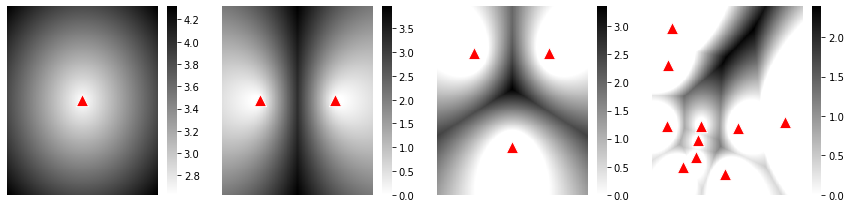

In [16]:
x1 = (np.expand_dims(np.arange(-100,101), axis=0).repeat(201, axis=0))/100
x2 = x1.T

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,3))

for row_, time_window in enumerate([1]):
    data_dir = '2022-06-02'

    method = 'scibert'
    # method = 'tfidf'
    # method = 'glove'

    # time_window = 1
    time_window = 6

    contain_zero = False
    # contain_zero = True

    valid_samples = pd.read_csv(f'computed_metric/valid_samples_{data_dir}_{method}_timewindow_{time_window}.csv',sep='\t')

    if not contain_zero:
        valid_samples = valid_samples.loc[valid_samples['count']>0]

    all_year_month =  ['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10',
                 '2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10',
                 '2021-11','2021-12','2022-01','2022-02','2022-03']

    year_months_train = all_year_month[1:-time_window-1]
    year_months_test = all_year_month[-time_window-1:-time_window]

    valid_samples_train = valid_samples.loc[valid_samples['publish_year_month'].isin(year_months_train)]
    # valid_samples_test = valid_samples.loc[valid_samples['publish_year_month'].isin(year_months_test)]

    # valid_samples_train = pd.concat([valid_samples_train, valid_samples_test], axis=0)

    X = valid_samples_train[['mean_cos_distance','min_cos_distance']].values
    X[:, 0] = 1-X[:, 0]
    y = valid_samples_train['count'].values
    X2 = sm.add_constant(X,prepend=True,has_constant=True)
    est = sm.OLS(y, X2)
    results = est.fit()

    anchors = [[-0.0, 0.0]]
    dists = []
    for anchor in anchors:
        dist = np.sqrt((x1-anchor[0])**2 + (x2-anchor[1])**2)
        dist = np.expand_dims(dist, axis=-1)
        dists.append(dist)
    dists = np.concatenate(dists, axis=-1)
    min_dist = dists.min(axis=-1)
    mean_dist = 1-dists.mean(axis=-1)
    values = mean_dist*results.params[1]+min_dist*results.params[2]+results.params[0]
    values[values<0] = 0
    sns.heatmap(values, cmap='binary', ax = axes[0])
    plot_anchors(anchors, axes[0])
    
    anchors = [[-0.5, 0.0], [0.5, 0.0]]
    dists = []
    for anchor in anchors:
        dist = np.sqrt((x1-anchor[0])**2 + (x2-anchor[1])**2)
        dist = np.expand_dims(dist, axis=-1)
        dists.append(dist)
    dists = np.concatenate(dists, axis=-1)
    min_dist = dists.min(axis=-1)
    mean_dist = 1-dists.mean(axis=-1)
    values = mean_dist*results.params[1]+min_dist*results.params[2]+results.params[0]
    values[values<0] = 0
    sns.heatmap(values, cmap='binary', ax = axes[1])
    plot_anchors(anchors, axes[1])
    
    anchors = [[0.0, 0.5], [0.5, -0.5], [-0.5, -0.5]]
    dists = []
    for anchor in anchors:
        dist = np.sqrt((x1-anchor[0])**2 + (x2-anchor[1])**2)
        dist = np.expand_dims(dist, axis=-1)
        dists.append(dist)
    dists = np.concatenate(dists, axis=-1)
    min_dist = dists.min(axis=-1)
    mean_dist = 1-dists.mean(axis=-1)
    values = mean_dist*results.params[1]+min_dist*results.params[2]+results.params[0]
    values[values<0] = 0
    sns.heatmap(values, cmap='binary', ax = axes[2])
    plot_anchors(anchors, axes[2])
    
    anchors = [[np.random.uniform(-0.8,0.8,1)[0], np.random.uniform(-0.8,0.8,1)[0]] for i in range(10)]
    dists = []
    for anchor in anchors:
        dist = np.sqrt((x1-anchor[0])**2 + (x2-anchor[1])**2)
        dist = np.expand_dims(dist, axis=-1)
        dists.append(dist)
    dists = np.concatenate(dists, axis=-1)
    min_dist = dists.min(axis=-1)
    mean_dist = 1-dists.mean(axis=-1)
    values = mean_dist*results.params[1]+min_dist*results.params[2]+results.params[0]
    values[values<0] = 0
    sns.heatmap(values, cmap='binary', ax = axes[3])
    plot_anchors(anchors, axes[3])
    
fig.tight_layout()
# fig.savefig(f"{time_window}_metric_case.png", dpi=500)
#windowsize =6

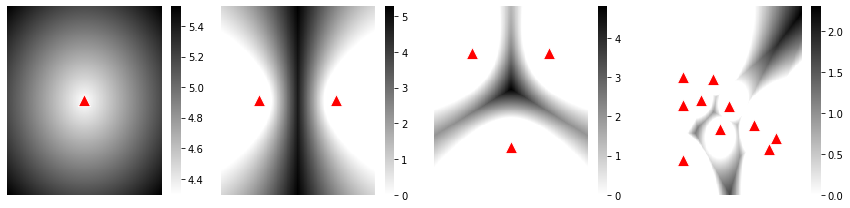

In [17]:
# 12